<a href="https://colab.research.google.com/github/jasleenkaurr/diabetes_prediction_model/blob/main/complete_model_for_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV,ElasticNet ,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix ,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
data =pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Type
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,2
4,0,137,40,35,168,43.1,2.288,33,1,2


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Type
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.450521,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,1.513021
std,2.866458,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.500156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,1.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,2.000000
75%,5.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,2.000000
max,10.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,2.000000


In [6]:
data.describe().T #way of representation (just the transpose)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.450521,2.866458,0.000,1.00000,3.0000,5.00000,10.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
Type,768.0,1.513021,0.500156,1.000,1.00000,2.0000,2.00000,2.00


In [7]:
data.isnull().sum()  # to check for any missing values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Type                        0
dtype: int64

<ipython-input-8-be86dfd1d52f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-8-be86dfd1d52f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-8-be86dfd1d52f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in 

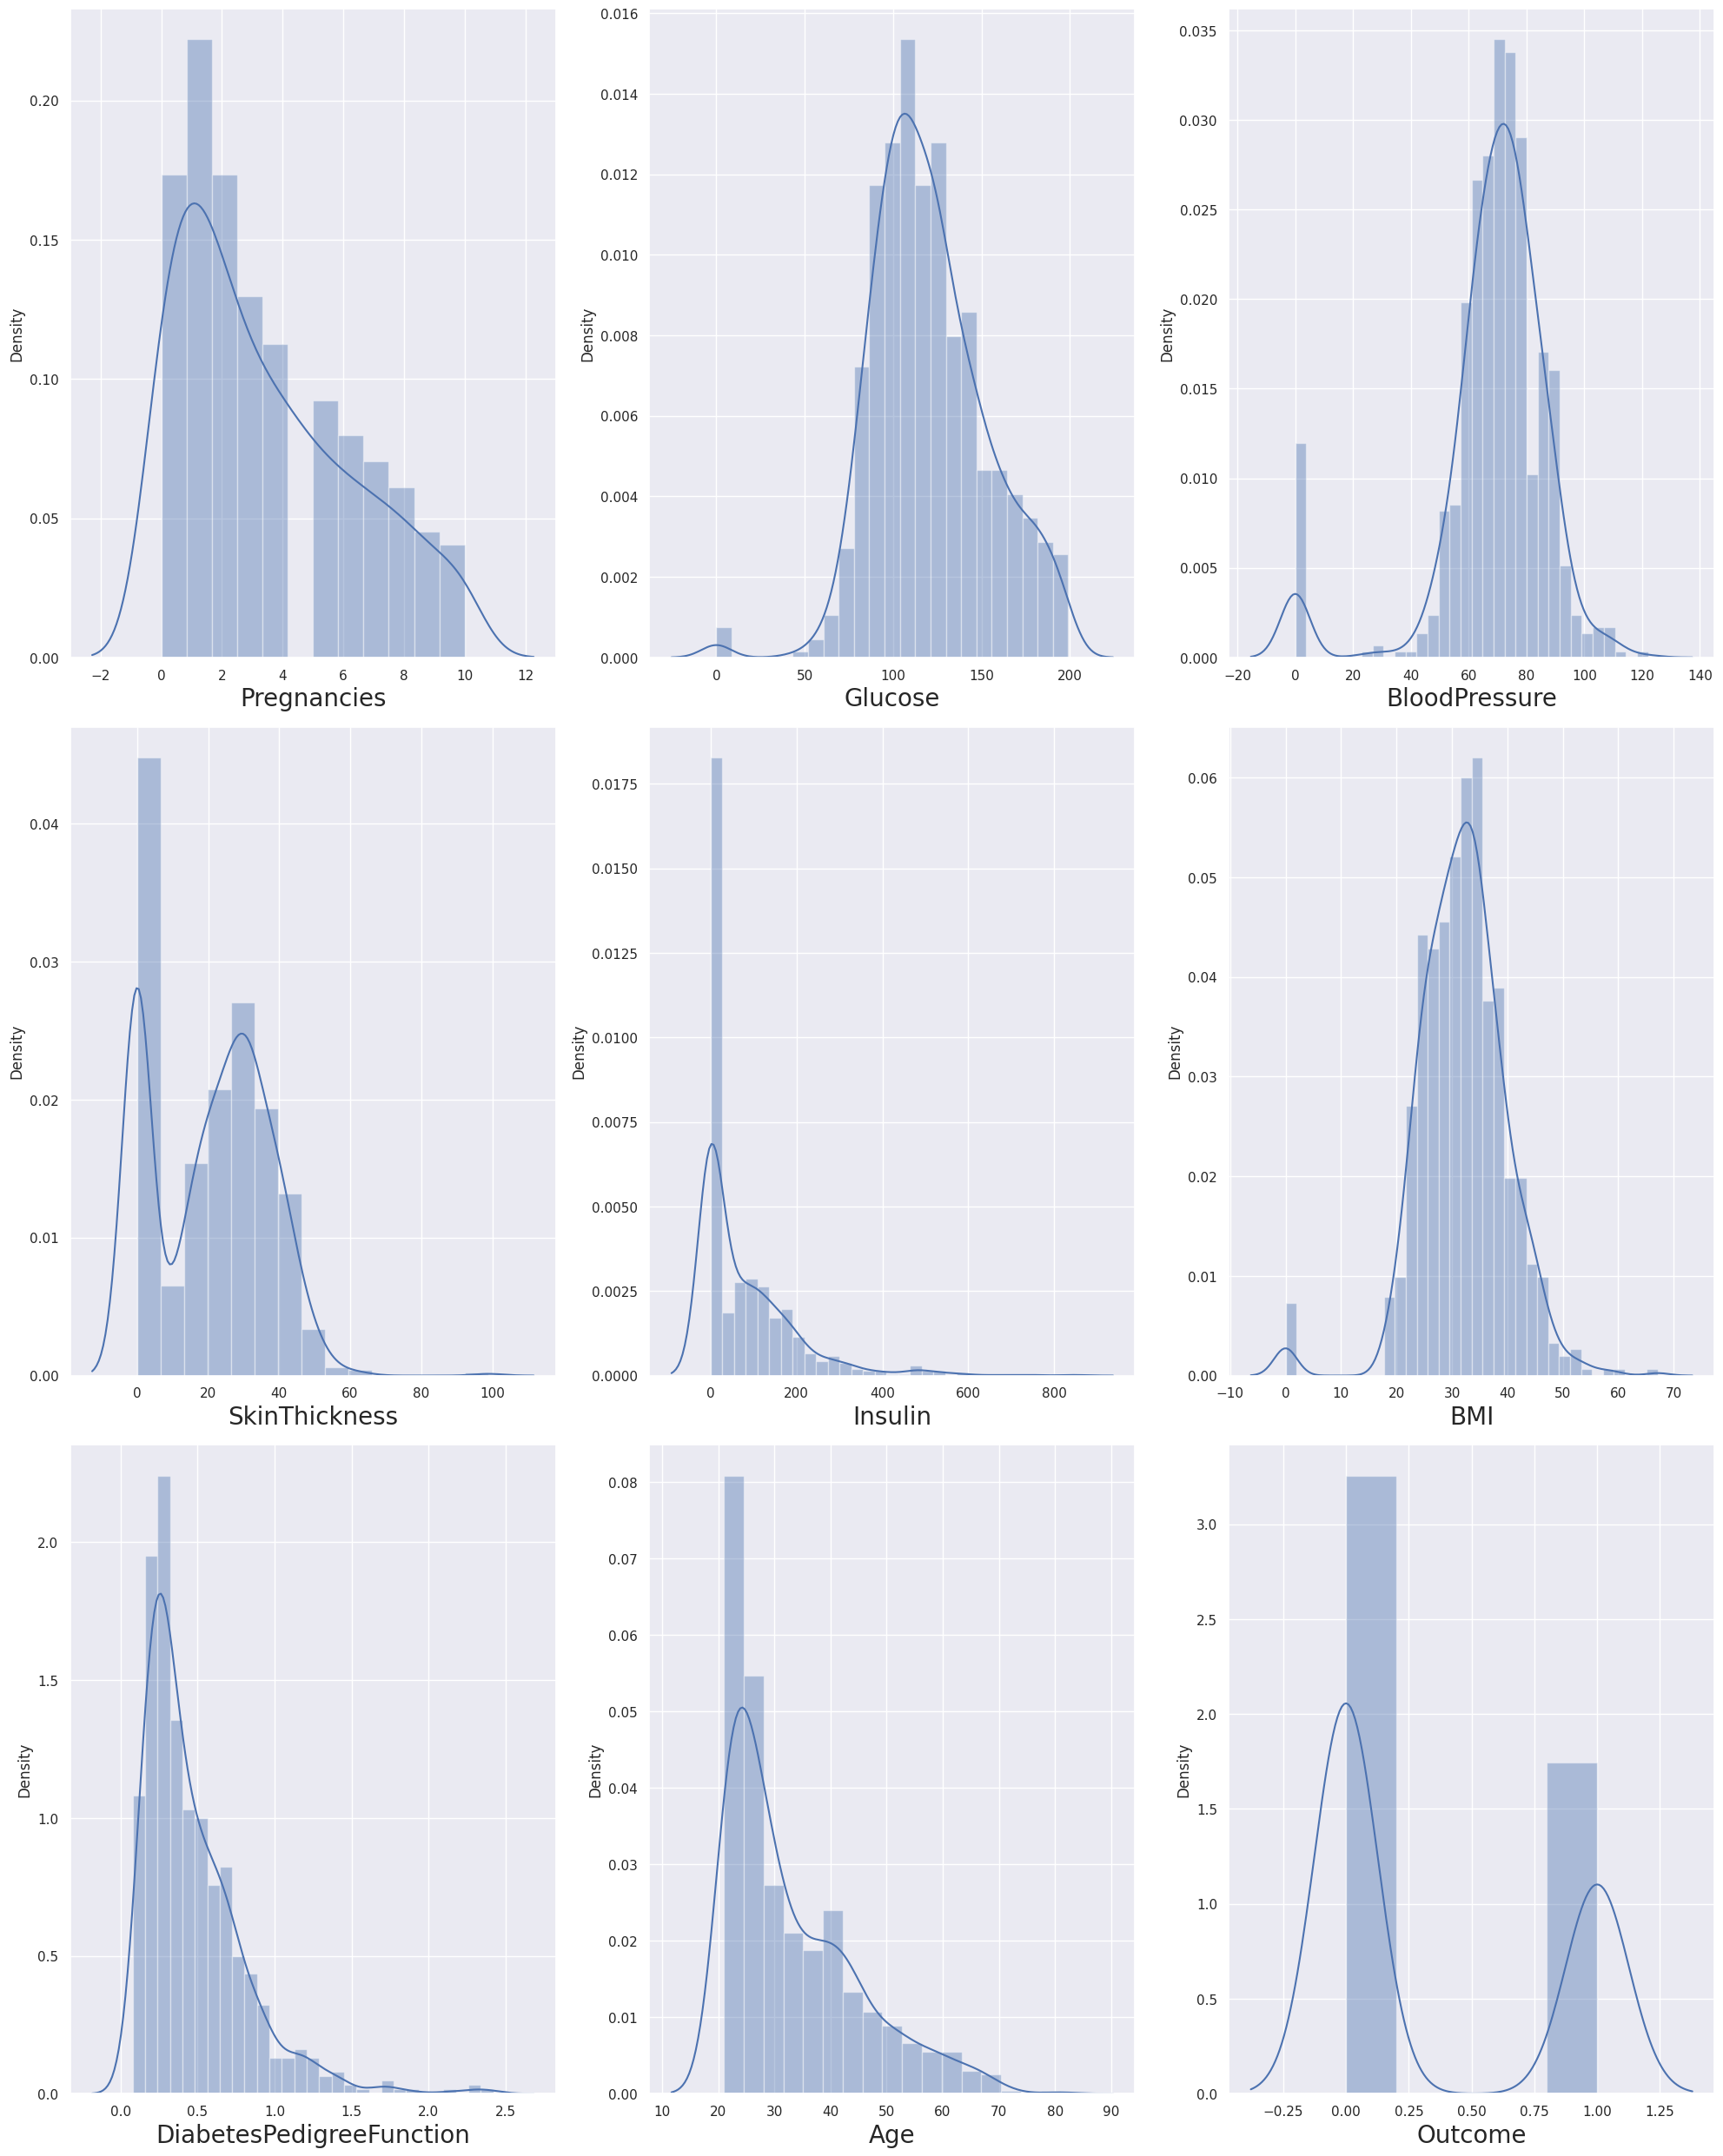

In [8]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber =1
for column in data :
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [9]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())  # by finding mean

<ipython-input-10-da57b02b065c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-10-da57b02b065c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-10-da57b02b065c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed 

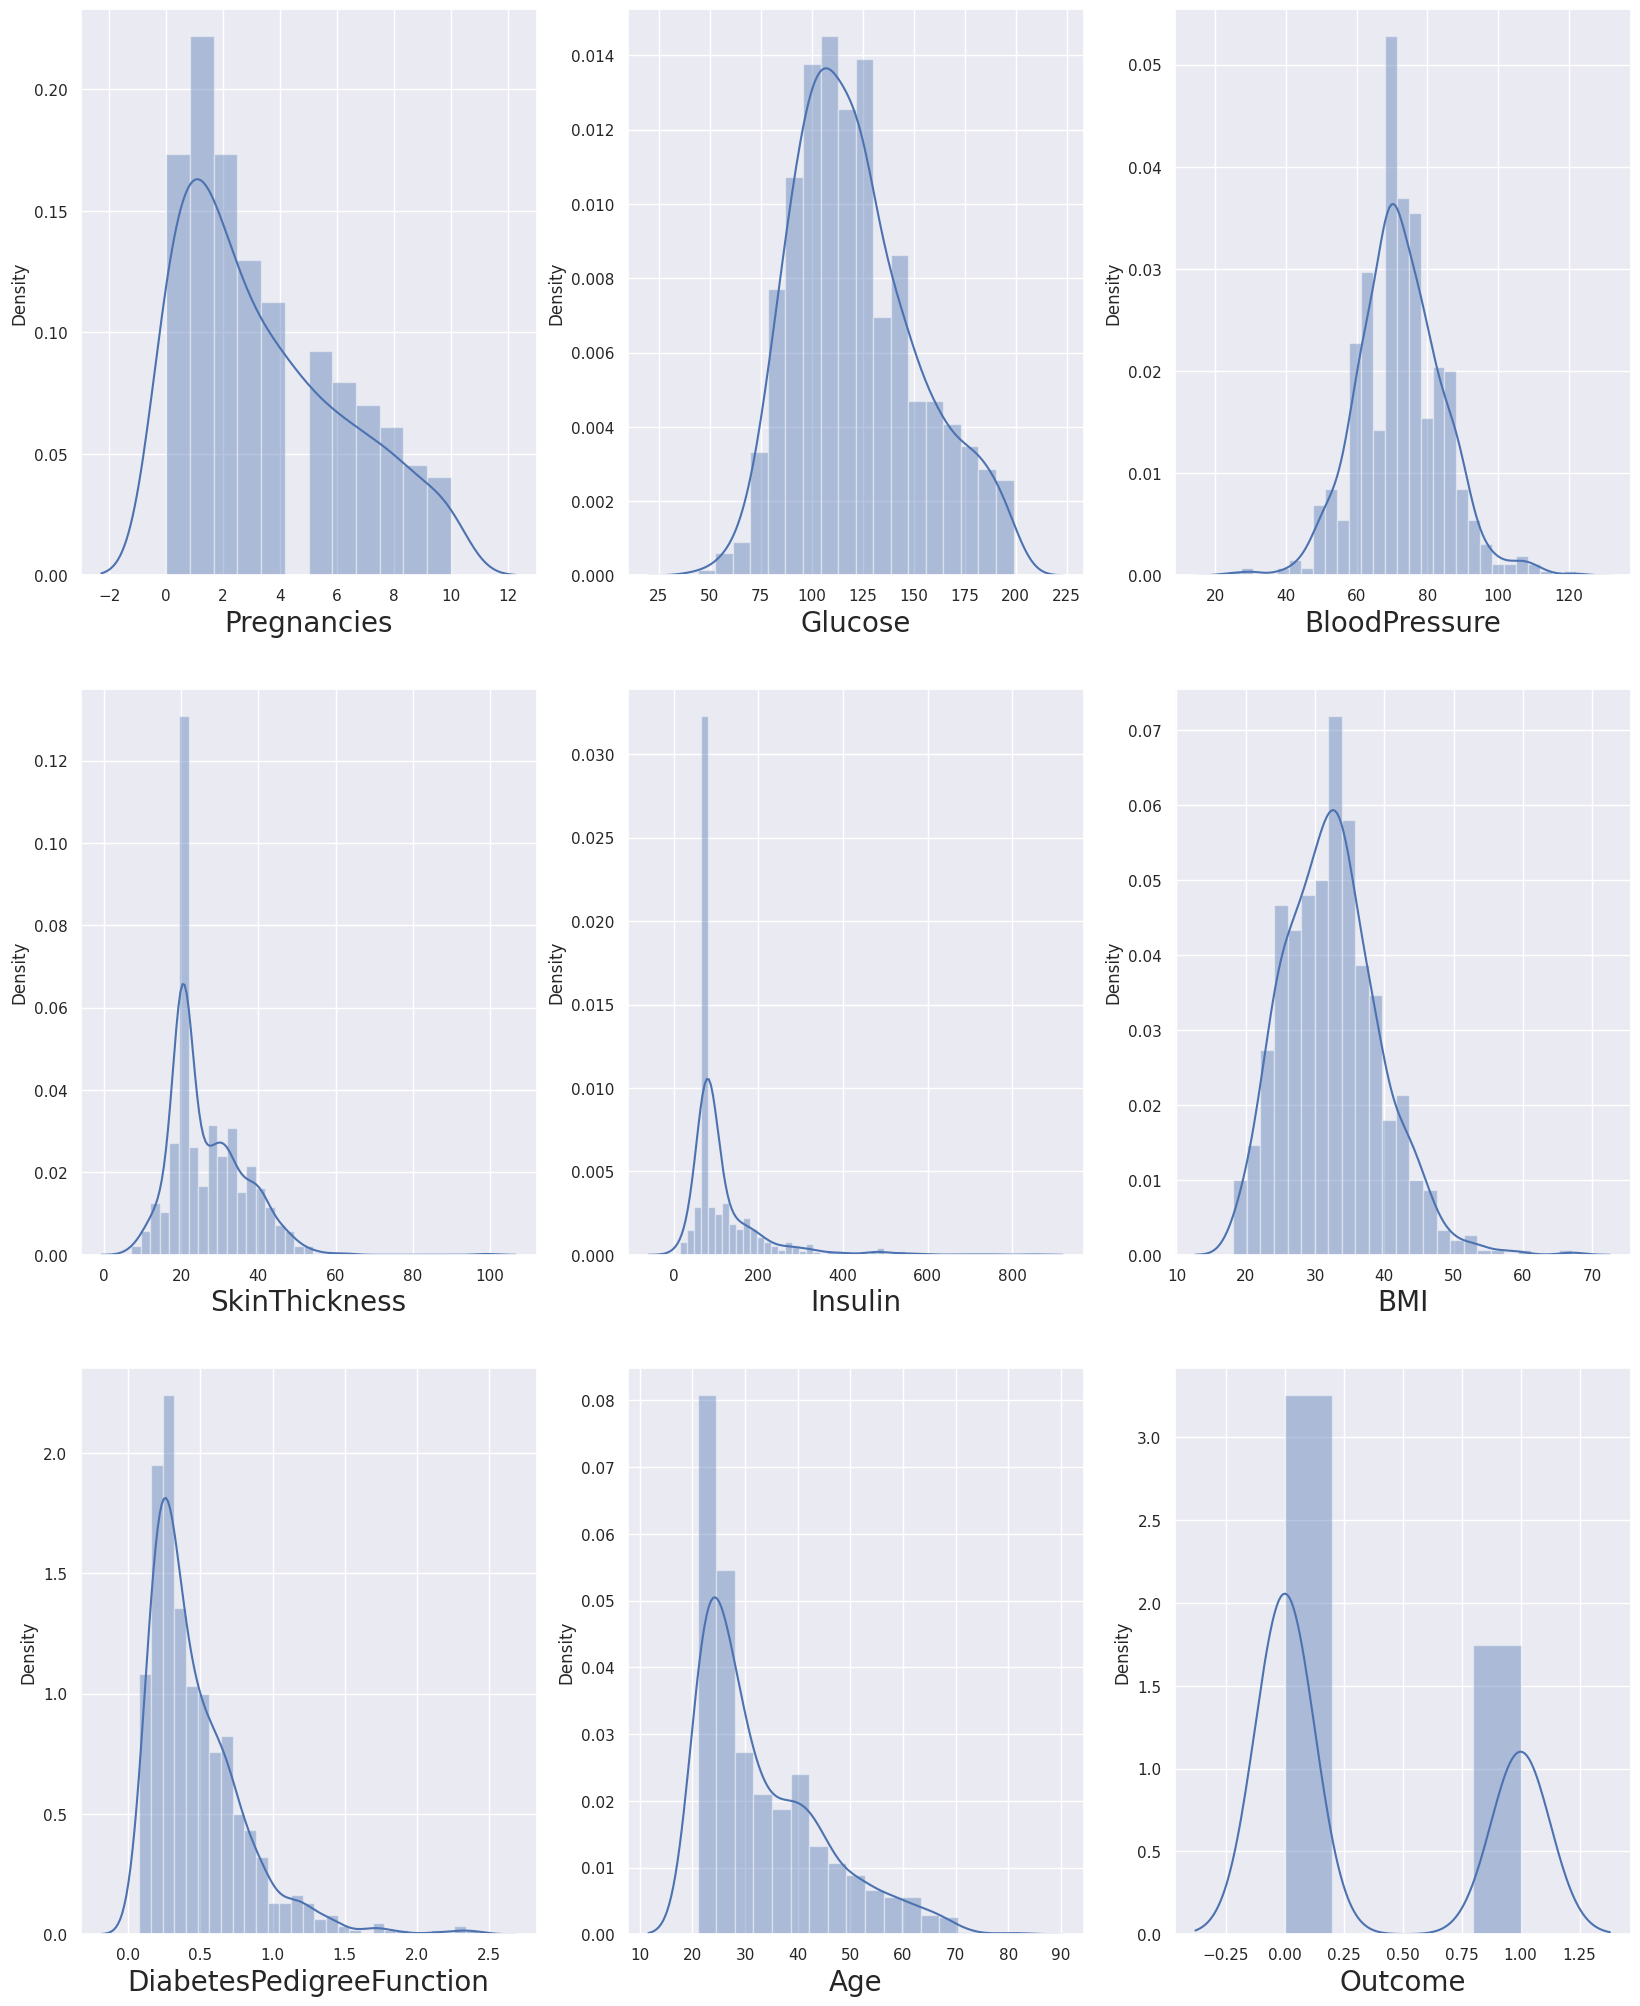

In [10]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

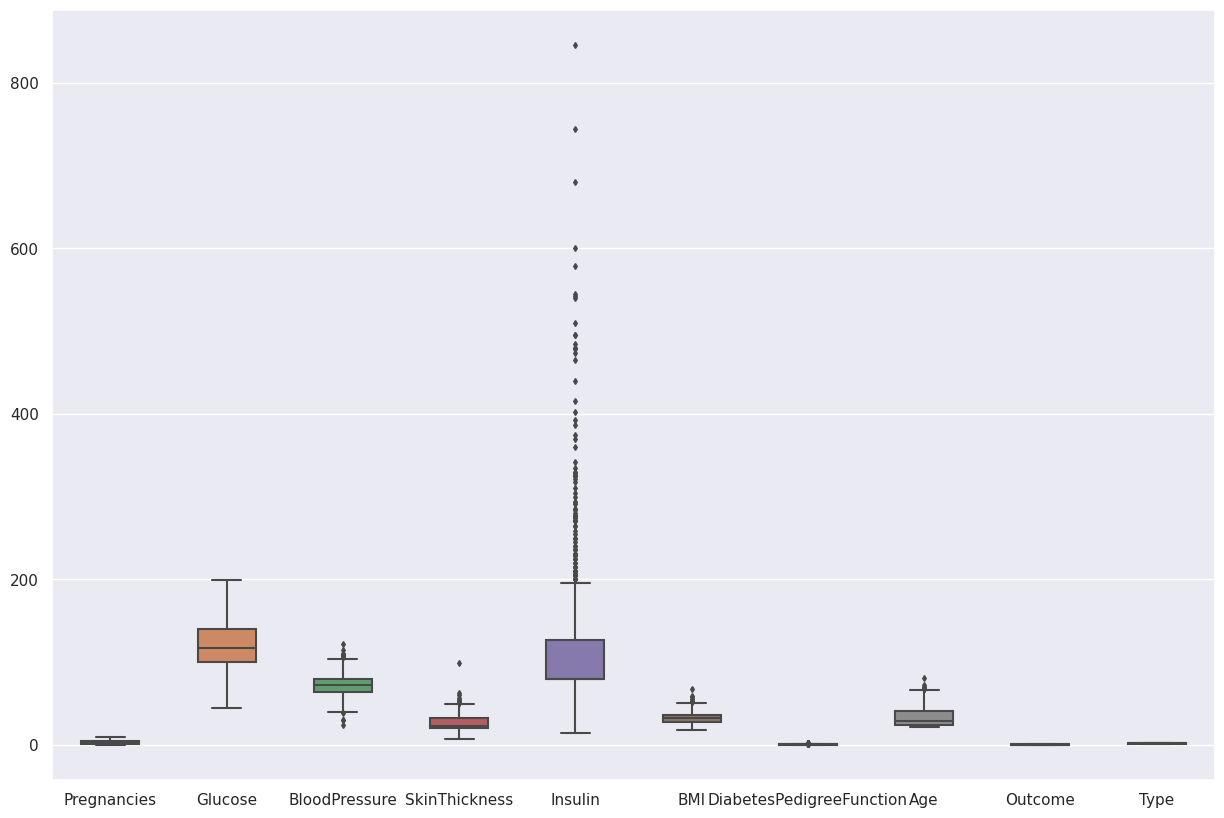

In [11]:
fig ,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width =0.5,ax=ax,fliersize=3)


In [12]:
#let's deal with the outliers


q = data['Pregnancies'].quantile(0.98)


# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)


# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)


# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)


# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)


# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)


# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

<ipython-input-13-47984a5b30b1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
<ipython-input-13-47984a5b30b1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
<ipython-input-13-47984a5b30b1>:6: UserWarning: 

`distplot` is a deprecated function and 

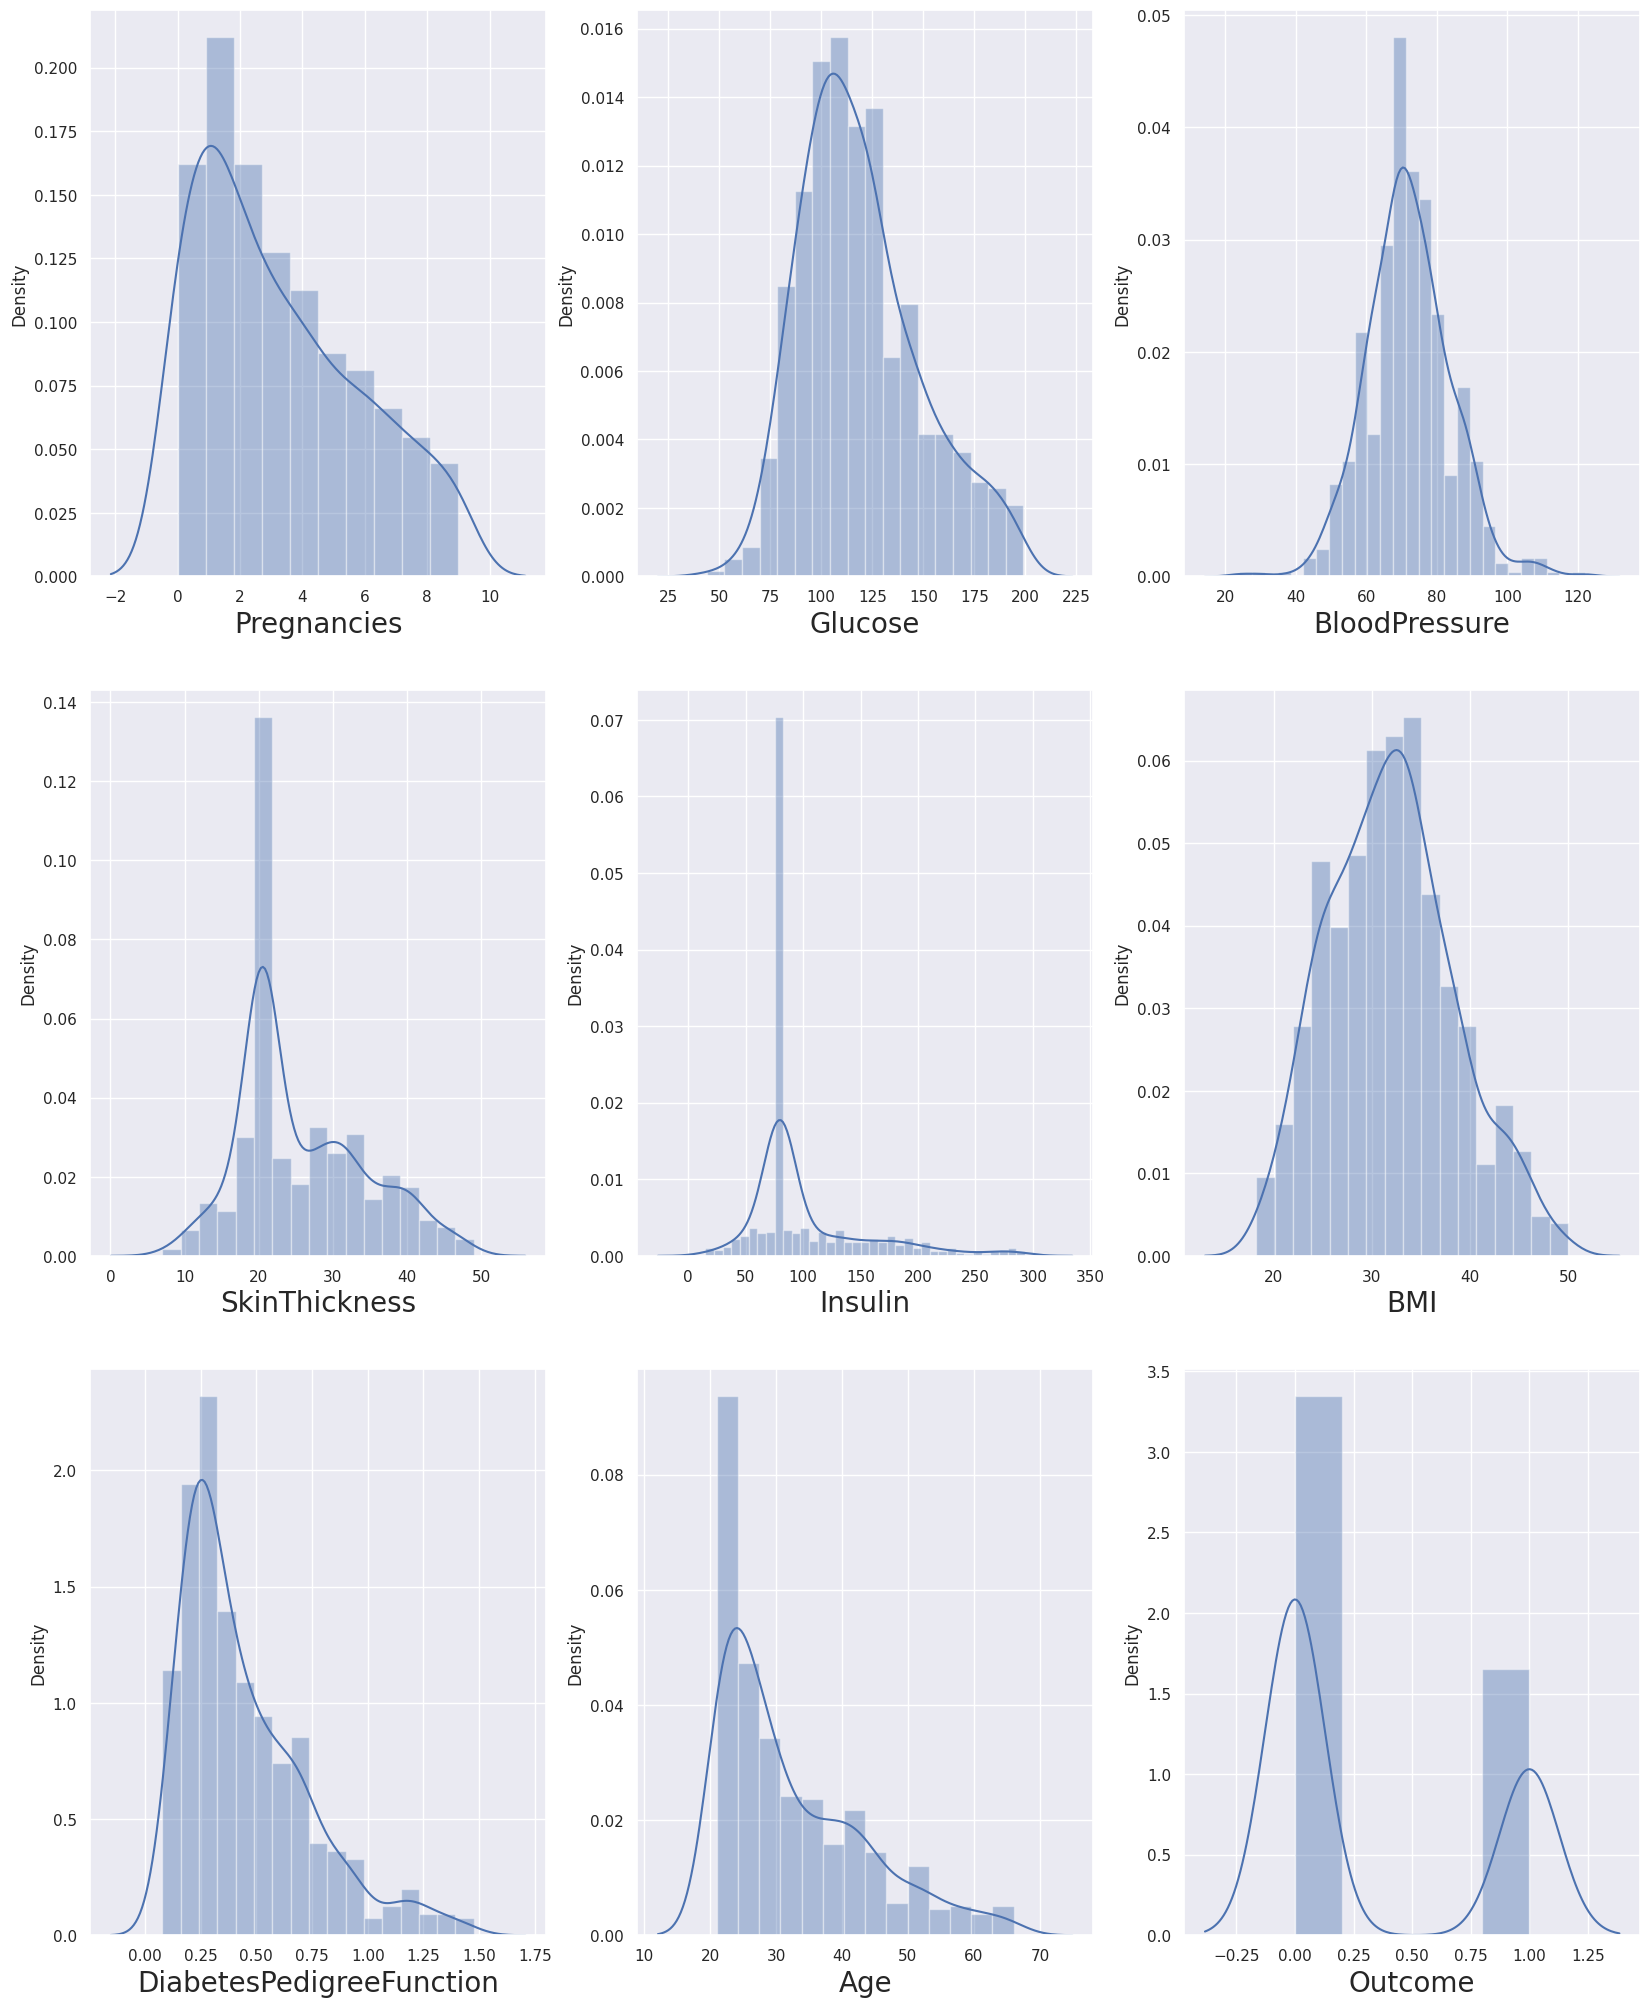

In [13]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

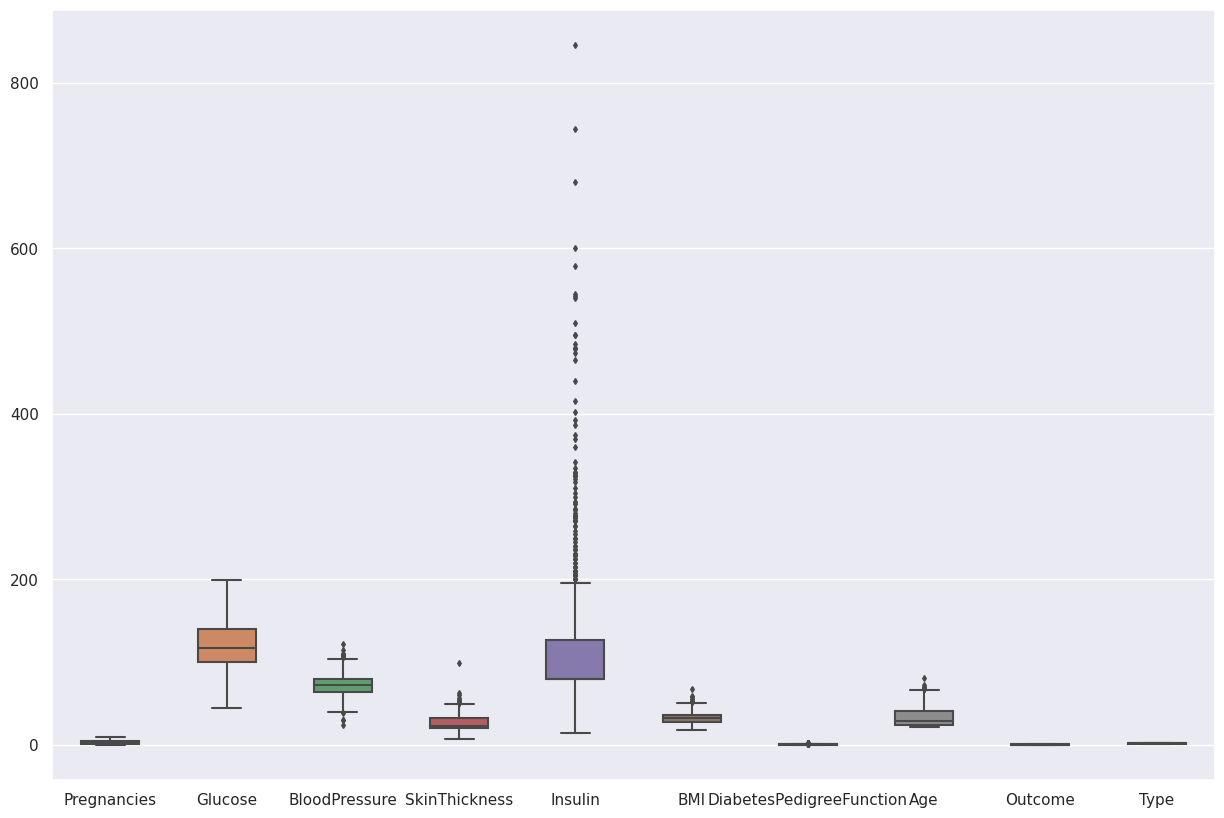

In [14]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data ,width=0.5,ax=ax ,fliersize=3)

In [15]:
X = data.drop(columns=['Outcome'])
y=data['Outcome']

In [16]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 9), (192, 9))

In [17]:
import bz2,pickle
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #saving the model
    file = bz2.BZ2File("C:\\Users\\IRA GUPTA\\Desktop\\IRA\\PROJECTS AND SOCIETIES\\Diabetes_prediction\\standardScalar.pkl",'wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled, X_test_scaled

In [18]:
X_train_scaled, X_test_scaled= scaler_standard(X_train,X_test)

In [19]:
X_train_scaled

array([[ 1.92917958, -1.09947934, -0.89942504, ..., -0.98325882,
        -0.04863985, -1.06458129],
       [-0.83846037, -0.1331471 , -1.23618124, ..., -0.62493647,
        -0.88246592,  0.93933644],
       [-1.18441536, -1.03283573,  0.61597784, ...,  0.39884168,
        -0.5489355 , -1.06458129],
       ...,
       [ 0.19940461, -0.93287033, -0.64685789, ..., -0.96519215,
        -1.04923114, -1.06458129],
       [-0.83846037, -1.23276654,  0.11084355, ..., -0.5075031 ,
         0.11812536, -1.06458129],
       [ 0.54535961,  0.46664532,  0.78435594, ...,  0.51627505,
         2.953134  , -1.06458129]])

In [20]:
log_reg =LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [21]:
log_reg.score(X_train_scaled,y_train)

0.7725694444444444

In [22]:
def adj_r2(x,y,r2):
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2 =1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [23]:
adj_r2(X_train_scaled,y_train,log_reg.score(X_train_scaled,y_train))

0.7689530575186494

In [24]:
y_pred=log_reg.predict(X_test_scaled)

In [25]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [26]:
true_positive =conf_mat[0][0]
false_positive =conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [27]:
Accuracy =(true_positive + true_negative) /(true_positive+false_positive + false_negative +true_negative)
Accuracy

0.796875

In [28]:
precision =true_positive/(true_positive+false_positive)
precision

0.9

In [29]:
recall =true_positive/(true_positive+false_negative)
recall

0.8181818181818182

In [30]:
f1_score =2*(recall *precision)/(recall+precision)
f1_score

0.8571428571428572

In [31]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7403225806451613

In [32]:
fpr,tpr,thresholds =roc_curve(y_test ,y_pred)

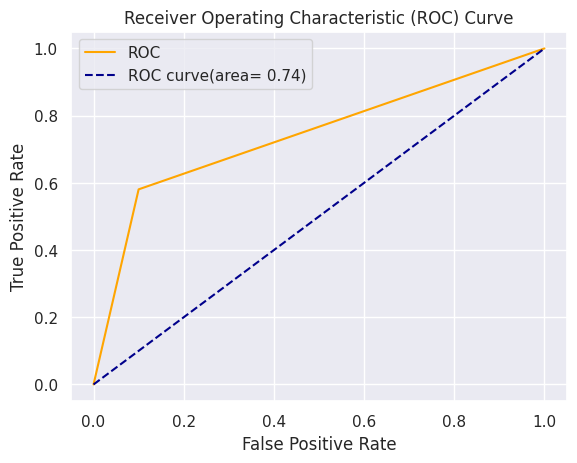

In [33]:
plt.plot(fpr,tpr ,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area= %0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [400, 500, 600],
              'max_leaf_nodes': [14, 15, 16]}
random_forest = RandomForestClassifier(n_jobs=-1)

grid_search_rf = GridSearchCV(random_forest,
                              param_grid=param_grid,
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_leaf_nodes': [14, 15, 16],
                         'n_estimators': [400, 500, 600]},
             return_train_score=True, scoring='recall')

In [36]:
print(classification_report(y_test, grid_search_rf.predict(X_test)))
print(roc_auc_score(y_test, grid_search_rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       130
           1       0.72      0.50      0.59        62

    accuracy                           0.78       192
   macro avg       0.76      0.70      0.72       192
weighted avg       0.77      0.78      0.76       192

0.8570719602977668


In [37]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Type'],
      dtype='object')


Available columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Type'],
      dtype='object')


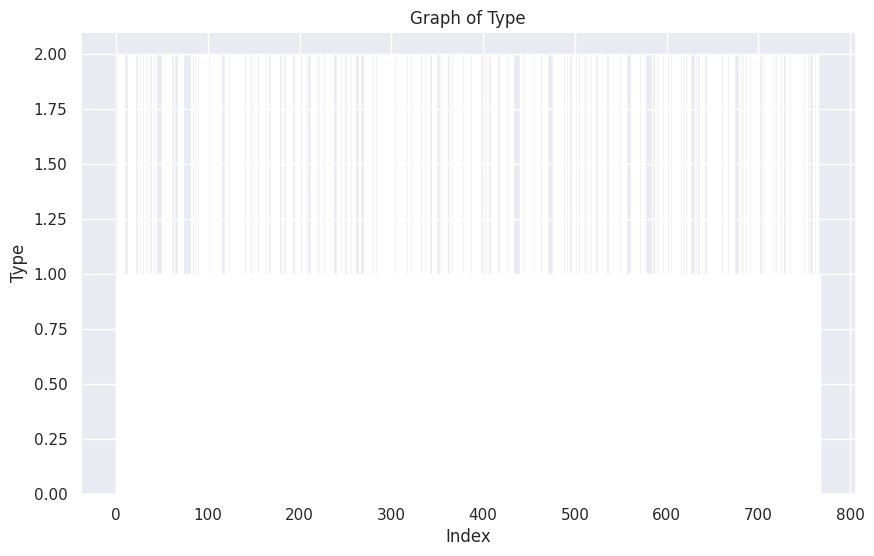

In [38]:
print("Available columns:", data.columns)

column_to_plot = 'Type'


if column_to_plot in data.columns:

    plt.figure(figsize=(10, 6))
    plt.bar(data.index, data[column_to_plot],color='black')


    plt.title(f'Graph of {column_to_plot}')
    plt.xlabel('Index')
    plt.ylabel(column_to_plot)

    plt.show()
else:
    print(f"Column '{column_to_plot}' not found in the DataFrame.")


Available columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Type'],
      dtype='object')


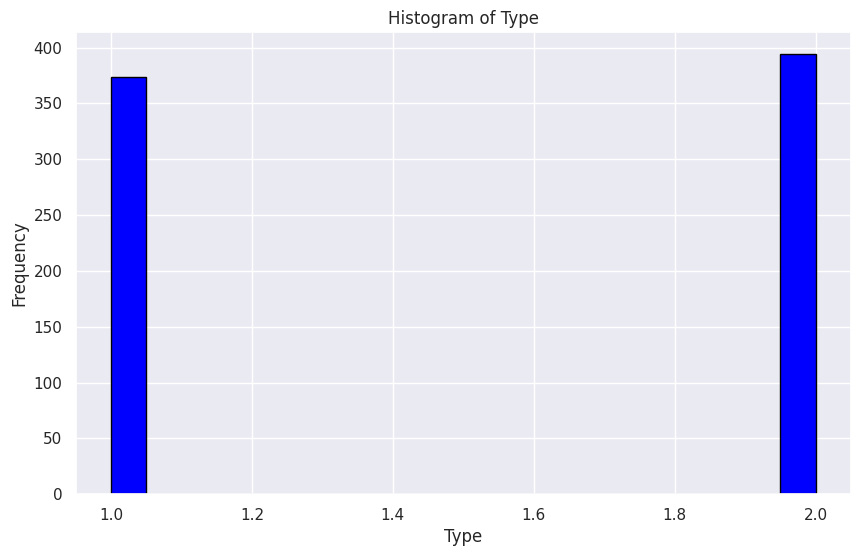

In [39]:


print("Available columns:", data.columns)

column_to_plot = 'Type'

if column_to_plot in data.columns:
    plt.figure(figsize=(10, 6))


    plt.hist(data[column_to_plot], color='blue', bins=20, edgecolor='black')

    plt.title(f'Histogram of {column_to_plot}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Frequency')

    plt.show()
else:
    print(f"Column '{column_to_plot}' not found in the DataFrame.")
